# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** ilyas imam ibrahim
- **Email:** ilyasmules.9803@gmail.com
- **ID Dicoding:** MC009D5Y2044

## Menentukan Pertanyaan Bisnis

- Apa faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Faktor paling berpengaruh terhadap jumlah penyewaan sepeda adalah Hari kerja atau akhir pekan
- Cuaca cerah meningkatkan jumlah peminjaman.
- Hujan dan angin kencang mengurangi jumlah peminjaman secara drastis.x

### Assessing Data

### Menilai tabel day.df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai tabel hour.df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Jam, musim, dan cuaca adalah faktor utama yang mempengaruhi penyewaan sepeda.
- Hari kerja lebih tinggi penyewaannya dibanding hari libur, terutama oleh pengguna terdaftar.
- Penyewaan tertinggi terjadi di musim panas dan lebih rendah saat hujan/cuaca buruk.



### Cleaning Data

### Memperbaiki Tipe Data

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Memperbaiki nilai 0 pada kolom windspeed

In [ ]:
zero_windspeed = hour_df[hour_df["windspeed"] == 0]
print("Jumlah data dengan windspeed = 0:", len(zero_windspeed))
print("Persentase data dengan windspeed = 0:", (len(zero_windspeed) / len(hour_df)) * 100, "%")

Jumlah data dengan windspeed = 0: 0
Persentase data dengan windspeed = 0: 0.0 %


Ganti windspeed = 0 dengan median berdasarkan weathersit, karena cuaca memengaruhi kecepatan angin.

In [ ]:
median_windspeed = hour_df.groupby("weathersit")["windspeed"].median()

hour_df.loc[hour_df["windspeed"] == 0, "windspeed"] = hour_df["weathersit"].map(median_windspeed)

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.194,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.194,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.194,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.194,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.194,0,1,1


**Insight:**
- Mengonversi kolom dteday pada day_df menjadi datetime agar lebih mudah diolah dalam analisis waktu.
- Dalam hour_df, terdapat data missing pada windspeed. Oleh karena itu, nilai windspeed diisi dengan nilai median berdasarkan weathersit.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [ ]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
476,477,2012-04-21,2,1,4,0,6,0,1,0.570000,0.542921,0.682917,0.283587,2541,4083,6624
141,142,2011-05-22,2,0,5,0,0,0,1,0.604167,0.574500,0.749583,0.148008,1576,3084,4660
52,53,2011-02-22,1,0,2,0,2,1,1,0.182222,0.186033,0.577778,0.195683,74,1376,1450
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
560,561,2012-07-14,3,1,7,0,6,0,2,0.703333,0.666042,0.699167,0.143679,2355,4614,6969


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season"] = day_df["season"].map(season_mapping)

print("\nStatistik Peminjaman Berdasarkan Musim:")
print(day_df.groupby(by="season")["cnt"].agg(["max", "min", "mean", "std", "count"]))



Statistik Peminjaman Berdasarkan Musim:
         max   min         mean          std  count
season                                             
Fall    8714  1115  5644.303191  1459.800381    188
Spring  7836   431  2604.132597  1399.942119    181
Summer  8362   795  4992.331522  1695.977235    184
Winter  8555    22  4728.162921  1699.615261    178


In [ ]:
weather_mapping = {1: "Clear", 2: "Misty/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain"}
day_df["weathersit"] = day_df["weathersit"].map(weather_mapping)

print("\nStatistik Peminjaman Berdasarkan Kondisi Cuaca:")
print(day_df.groupby(by="weathersit")["cnt"].agg(["max", "min", "mean", "std", "count"]))



Statistik Peminjaman Berdasarkan Kondisi Cuaca:
                  max  min         mean          std  count
weathersit                                                 
Clear            8714  431  4876.786177  1879.483989    463
Light Rain/Snow  4639   22  1803.285714  1240.284449     21
Misty/Cloudy     8362  605  4035.862348  1809.109918    247


In [ ]:
print("\nTotal Peminjaman Berdasarkan Hari Kerja:")
print(day_df.groupby(by="workingday")["cnt"].sum().sort_values(ascending=False))



Total Peminjaman Berdasarkan Hari Kerja:
workingday
1    2292410
0    1000269
Name: cnt, dtype: int64


In [ ]:
day_map = {
    0: "Sunday", 1: "Monday", 2: "Tuesday",
    3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
}

print("\nTotal Peminjaman Berdasarkan Hari dalam Seminggu:")
print(day_df.groupby(day_df['weekday'].map(day_map))['cnt'].sum().sort_values(ascending=False))



Total Peminjaman Berdasarkan Hari dalam Seminggu:
weekday
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: cnt, dtype: int64


In [ ]:
print("\nTotal Peminjaman Berdasarkan Hari Libur:")
print(day_df.groupby(by="holiday")["cnt"].sum().sort_values(ascending=False))



Total Peminjaman Berdasarkan Hari Libur:
holiday
0    3214244
1      78435
Name: cnt, dtype: int64


In [ ]:
workingday_rentals = day_df.groupby("workingday")[["casual", "registered"]].sum()
workingday_rentals.index = workingday_rentals.index.map({0: "Hari Libur/Weekend", 1: "Hari Kerja"})

print("\nTotal Peminjaman Berdasarkan Casual dan Registered di Hari Kerja:")
print(workingday_rentals)


Total Peminjaman Berdasarkan Casual dan Registered di Hari Kerja:
                    casual  registered
workingday                            
Hari Libur/Weekend  316732      683537
Hari Kerja          303285     1989125


In [ ]:
weekly_rentals = day_df.groupby("weekday")[["casual", "registered"]].sum().reset_index()

weekly_rentals["weekday"] = weekly_rentals["weekday"].map(day_map)


weekly_rentals = weekly_rentals.set_index("weekday").reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

print("\nTotal Peminjaman Setiap Hari dalam Seminggu (Casual & Registered):")
print(weekly_rentals)


Total Peminjaman Setiap Hari dalam Seminggu (Casual & Registered):
           casual  registered
weekday                      
Monday      70784      384719
Tuesday     57843      411266
Wednesday   57319      415729
Thursday    61460      423935
Friday      78238      409552
Saturday   153852      323955
Sunday     140521      303506


In [ ]:
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

monthly_rentals = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

monthly_rentals['yr'] = monthly_rentals['yr'].map({0: 2011, 1: 2012})

monthly_rentals['mnth'] = monthly_rentals['mnth'].map(month_mapping)

print("\nTotal Peminjaman Setiap Bulan dalam Setiap Tahun:")
print(monthly_rentals)


Total Peminjaman Setiap Bulan dalam Setiap Tahun:
      yr mnth     cnt
0   2011  Jan   38189
1   2011  Feb   48215
2   2011  Mar   64045
3   2011  Apr   94870
4   2011  May  135821
5   2011  Jun  143512
6   2011  Jul  141341
7   2011  Aug  136691
8   2011  Sep  127418
9   2011  Oct  123511
10  2011  Nov  102167
11  2011  Dec   87323
12  2012  Jan   96744
13  2012  Feb  103137
14  2012  Mar  164875
15  2012  Apr  174224
16  2012  May  195865
17  2012  Jun  202830
18  2012  Jul  203607
19  2012  Aug  214503
20  2012  Sep  218573
21  2012  Oct  198841
22  2012  Nov  152664
23  2012  Dec  123713


### Explore hour_df

In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4390,4391,2011-07-06,3,0,7,20,0,3,1,1,0.72,0.6970,0.74,0.2537,55,257,312
17131,17132,2012-12-21,1,1,12,14,0,5,1,2,0.32,0.2879,0.39,0.4478,20,199,219
10593,10594,2012-03-22,2,1,3,12,0,4,1,2,0.54,0.5152,0.88,0.1940,48,224,272
16170,16171,2012-11-11,4,1,11,12,0,0,0,1,0.50,0.4848,0.48,0.0896,195,390,585
9960,9961,2012-02-25,1,1,2,1,0,6,0,1,0.34,0.3030,0.42,0.3582,4,42,46


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.213455,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.099557,49.305030,151.357286,181.387599


In [ ]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
hour_df["season"] = hour_df["season"].map(season_mapping)

print("\nStatistik Peminjaman Berdasarkan Musim:")
print(hour_df.groupby(by="season")["cnt"].agg(["max", "min", "mean", "std", "count"]))



Statistik Peminjaman Berdasarkan Musim:
        max  min        mean         std  count
season                                         
Fall    977    1  236.016237  197.711630   4496
Spring  801    1  111.114569  119.224010   4242
Summer  957    1  208.344069  188.362473   4409
Winter  967    1  198.868856  182.967972   4232


In [ ]:
weather_mapping = {1: "Clear", 2: "Misty/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain"}
hour_df["weathersit"] = hour_df["weathersit"].map(weather_mapping)

print("\nStatistik Peminjaman Berdasarkan Kondisi Cuaca:")
print(hour_df.groupby(by="weathersit")["cnt"].agg(["max", "min", "mean", "std", "count"]))



Statistik Peminjaman Berdasarkan Kondisi Cuaca:
                 max  min        mean         std  count
weathersit                                              
Clear            977    1  204.869272  189.487773  11413
Heavy Rain       164   23   74.333333   77.925178      3
Light Rain/Snow  891    1  111.579281  133.781045   1419
Misty/Cloudy     957    1  175.165493  165.431589   4544


In [ ]:
day_map = {
    0: "Sunday", 1: "Monday", 2: "Tuesday",
    3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
}

print("\nTotal Peminjaman Berdasarkan Hari dalam Seminggu:")
print(hour_df.groupby(hour_df['weekday'].map(day_map))['cnt'].sum().sort_values(ascending=False))



Total Peminjaman Berdasarkan Hari dalam Seminggu:
weekday
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: cnt, dtype: int64


In [ ]:
print("\nTotal Peminjaman Berdasarkan Jam:")
print(hour_df.groupby("hr")["cnt"].sum())


Total Peminjaman Berdasarkan Jam:
hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


In [ ]:
print("\nTotal Peminjaman Berdasarkan Hari Kerja:")
print(hour_df.groupby(by="workingday")["cnt"].sum().sort_values(ascending=False))


Total Peminjaman Berdasarkan Hari Kerja:
workingday
1    2292410
0    1000269
Name: cnt, dtype: int64


In [ ]:
workingday_rentals = hour_df.groupby("workingday")[["casual", "registered"]].sum()
workingday_rentals.index = workingday_rentals.index.map({0: "Hari Libur/Weekend", 1: "Hari Kerja"})

print("\nTotal Peminjaman Berdasarkan Casual dan Registered di Hari Kerja:")
print(workingday_rentals)


Total Peminjaman Berdasarkan Casual dan Registered di Hari Kerja:
                    casual  registered
workingday                            
Hari Libur/Weekend  316732      683537
Hari Kerja          303285     1989125


In [ ]:
hourly_rentals = hour_df.groupby("hr")[["casual", "registered"]].sum()

print("\nTotal Peminjaman Setiap Jam dalam Sehari (Casual & Registered):")
print(hourly_rentals)


Total Peminjaman Setiap Jam dalam Sehari (Casual & Registered):
    casual  registered
hr                    
0     7375       31755
1     4709       19455
2     3412       12940
3     1893        6281
4      874        3554
5     1012       13249
6     3017       52115
7     8037      146134
8    15761      245240
9    22458      136980
10   33789       92468
11   43286      108034
12   49718      134696
13   52713      132206
14   55089      120563
15   54606      128543
16   53834      173914
17   54220      282640
18   44496      265276
19   35505      191284
20   26378      138172
21   20570      104875
22   16200       79412
23   11065       52876


### Explore All Data

### menghubungkan semua data

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

all_data = hour_df.merge(day_df, on="dteday", suffixes=("_hour", "_day"))

print("\nData Gabungan (all_data) - 5 Sample Data:")
print(all_data.sample(5))


Data Gabungan (all_data) - 5 Sample Data:
       instant_hour     dteday season_hour  yr_hour  mnth_hour  hr  \
5007           5008 2011-08-01        Fall        0          8  13   
11785         11786 2012-05-11      Summer        1          5   6   
11118         11119 2012-04-13      Summer        1          4  11   
3227           3228 2011-05-19      Summer        0          5   9   
6418           6419 2011-09-30      Winter        0          9   0   

       holiday_hour  weekday_hour  workingday_hour weathersit_hour  ...  \
5007              0             1                1           Clear  ...   
11785             0             5                1           Clear  ...   
11118             0             5                1           Clear  ...   
3227              0             4                1    Misty/Cloudy  ...   
6418              0             5                1           Clear  ...   

       weekday_day  workingday_day  weathersit_day  temp_day  atemp_day  \
5007      

In [ ]:
correlation_matrix = all_data[["cnt_hour", "temp_hour", "hum_hour", "windspeed_hour",
                               "workingday_day"]].corr()

print("\nKorelasi antara faktor lingkungan dan jumlah penyewaan sepeda:")
print(correlation_matrix["cnt_hour"].sort_values(ascending=False))



Korelasi antara faktor lingkungan dan jumlah penyewaan sepeda:
cnt_hour          1.000000
temp_hour         0.404772
windspeed_hour    0.077365
workingday_day    0.030284
hum_hour         -0.322911
Name: cnt_hour, dtype: float64


In [ ]:
weather_impact = all_data.groupby("weathersit_day")["cnt_hour"].agg(["mean", "sum"])
print("\nPengaruh Cuaca terhadap Penyewaan Sepeda:")
print(weather_impact)



Pengaruh Cuaca terhadap Penyewaan Sepeda:
                       mean      sum
weathersit_day                      
Clear            204.524638  2257952
Light Rain/Snow   80.916667    37869
Misty/Cloudy     169.793562   996858


**Insight:**
- Cuaca yang hangat dengan kelembapan rendah cenderung meningkatkan penyewaan sepeda.
- Puncak penyewaan terjadi saat jam berangkat dan pulang kerja.
- Sangat sedikit yang menyewa sepeda di malam hari.
- orang lebih banyak menyewa sepeda saat cuaca cerah atau berawan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda?

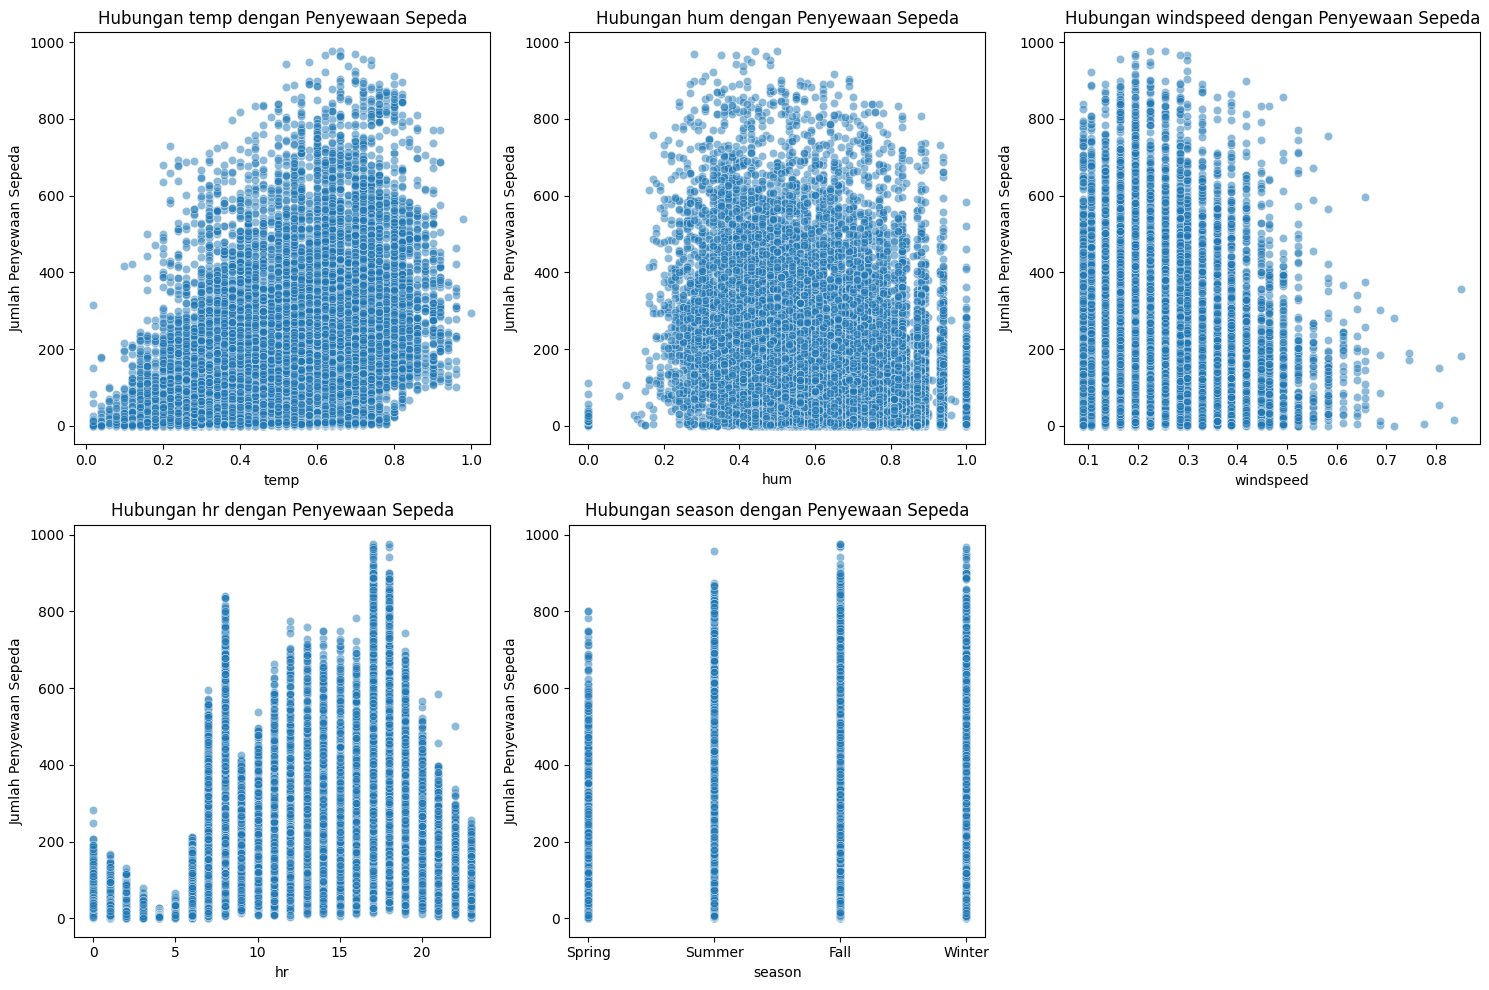

In [47]:
features = ["temp", "hum", "windspeed", "hr", "season"]
plt.figure(figsize=(15, 10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=hour_df[col], y=hour_df["cnt"], alpha=0.5)
    plt.title(f"Hubungan {col} dengan Penyewaan Sepeda")
    plt.xlabel(col)
    plt.ylabel("Jumlah Penyewaan Sepeda")

plt.tight_layout()
plt.show()


**Insight:**
- Suhu (temp) kemungkinan besar berbanding positif dengan penyewaan.
- Kelembaban (hum) bisa memiliki hubungan negatif jika terlalu tinggi.
- Kecepatan angin (windspeed) kemungkinan berpengaruh negatif.


### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

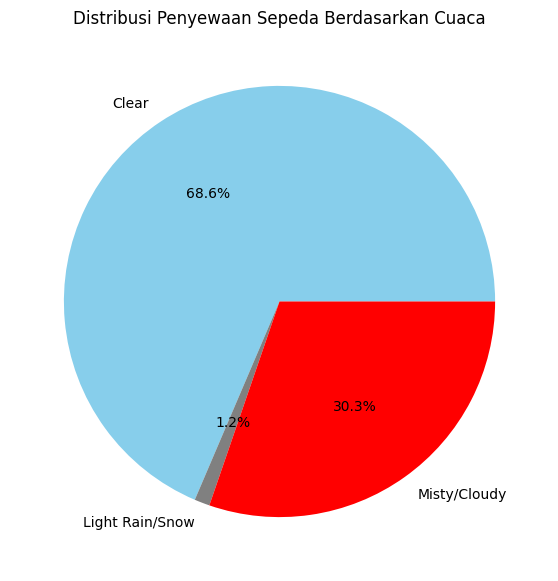

In [48]:
weather_distribution = day_df.groupby("weathersit")["cnt"].sum()

plt.figure(figsize=(7,7))
plt.pie(weather_distribution, labels=weather_distribution.index, autopct='%1.1f%%', colors=["skyblue", "gray", "red", "black"]) # Use weather_distribution.index to get the labels
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Cuaca")
plt.show()

**Insight:**
- Cuaca cerah mendorong penyewaan sepeda paling banyak, sementara cuaca buruk cenderung mengurangi minat orang untuk bersepeda.
- Pada cuaca hujan atau sangat buruk, jumlah penyewaan sepeda cenderung menurun drastis.

## Conclusion

- Conclution pertanyaan 1:
Apa faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda?

Faktor utama yang paling berpengaruh terhadap jumlah penyewaan sepeda adalah suhu, kondisi cuaca, musim, hari kerja vs. akhir pekan, dan jam dalam sehari. Penggunaan sepeda dipengaruhi oleh kebutuhan transportasi pada hari kerja serta faktor rekreasi pada akhir pekan, dengan kondisi cuaca yang menentukan apakah orang akan memilih sepeda sebagai alat transportasi atau tidak.



- Conclution pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

Cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Semakin buruk kondisi cuaca (hujan deras, badai, atau suhu ekstrem), semakin sedikit orang yang menyewa sepeda. Sebaliknya, pada hari cerah atau sedikit berawan, penyewaan sepeda meningkat karena kondisi yang lebih nyaman untuk bersepeda.

In [49]:
all_data.to_csv("all_data.csv", index=False)